Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

- R&D Spend -- Research and devolop spend in the past few years
- Administration -- spend on administration in the past few years
- Marketing Spend -- spend on Marketing in the past few years
- State -- states from which data is collected
- Profit  -- profit of each state in the past few years


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
startup = pd.read_csv('50_Startups.csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
startup.shape

(50, 5)

In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#check for missing values
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
startup = startup.rename({'R&D Spend':'RDS', 'Administration':'ADM', 'Marketing Spend':'MS'},axis=1)
startup

,RDS,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Correlation Matrix

In [7]:
startup.corr()

,RDS,ADM,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

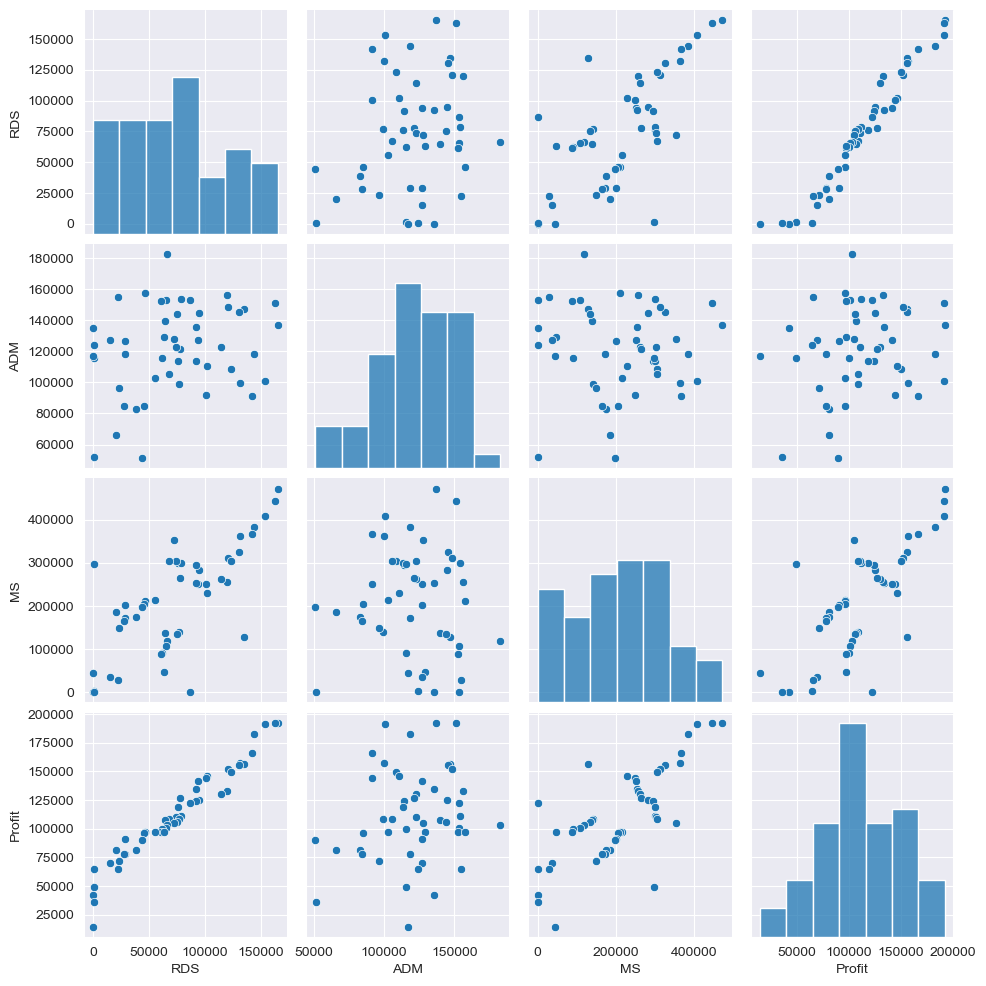

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

# Preparing a model


In [9]:
model = smf.ols('Profit~RDS+ADM+MS', data = startup).fit()

In [10]:
model.params

Intercept    50122.192990
RDS              0.805715
ADM             -0.026816
MS               0.027228
dtype: float64

In [11]:
model.tvalues

Intercept     7.626218
RDS          17.846374
ADM          -0.525507
MS            1.655077
dtype: float64

In [12]:
model.pvalues

Intercept    1.057379e-09
RDS          2.634968e-22
ADM          6.017551e-01
MS           1.047168e-01
dtype: float64

In [13]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression Model

In [14]:
slr_a=smf.ols('Profit~ADM', data = startup).fit()
slr_a.tvalues, slr_a.pvalues
slr_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 04 May 2023   Prob (F-statistic):              0.162
Time:                        23:57:34   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADM            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
slr_m = smf.ols('Profit~MS', data = startup).fit()
slr_m.tvalues, slr_m.pvalues
slr_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 04 May 2023   Prob (F-statistic):           4.38e-10
Time:                        23:57:34   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
slr_am = smf.ols('Profit~ADM+MS', data = startup).fit()
slr_am.tvalues, slr_am.pvalues
slr_am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Thu, 04 May 2023   Prob (F-statistic):           2.50e-10
Time:                        23:57:34   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADM            0.3237      0.131      2.468      0.017       0.060       0.588
MS             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Validation Techniques

In [17]:
rsq_r = smf.ols('RDS~ADM+MS',data = startup).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a = smf.ols('ADM~RDS+MS', data = startup).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_m = smf.ols('MS~RDS+ADM', data = startup).fit().rsquared
vif_m = 1/(1-rsq_m)

df1={'Variables':['RDS','ADM','MS'],'Vif':[vif_r,vif_a,vif_m]}
vif_df = pd.DataFrame(df1)
vif_df

,Variables,Vif
0,RDS,2.468903
1,ADM,1.175091
2,MS,2.326773


# Residuals Analysis

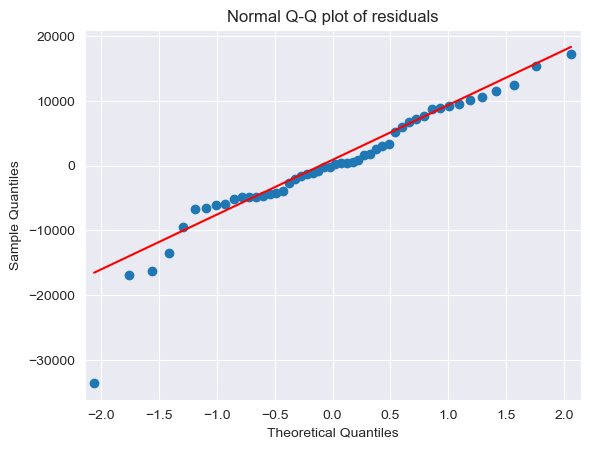

In [18]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [19]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

# Test for Homoscedasticity or Heteroscedasticity

In [20]:
def standard_values(vals):
    return (vals-vals.mean())/vals.std()

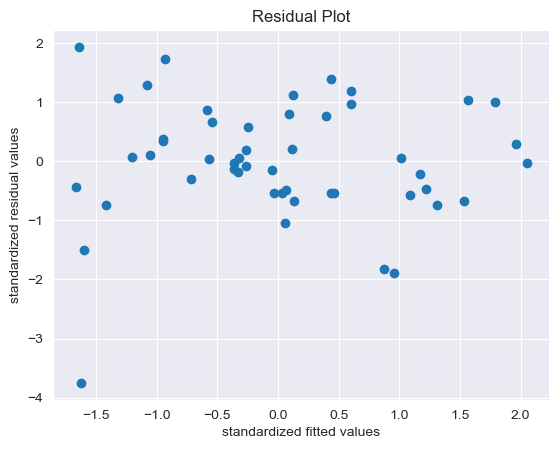

In [21]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

# Residual Vs Regressors 

eval_env: 1


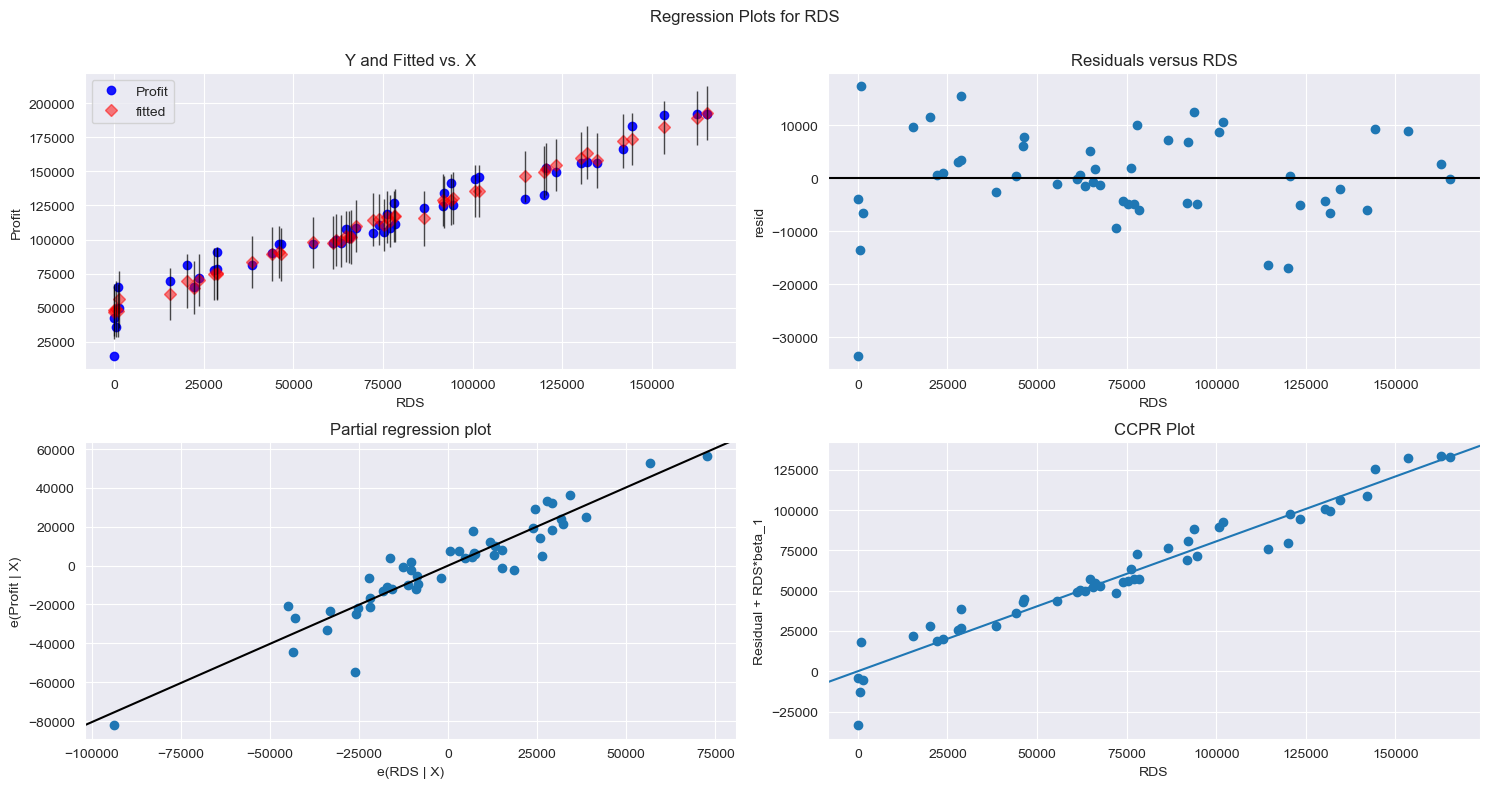

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

eval_env: 1


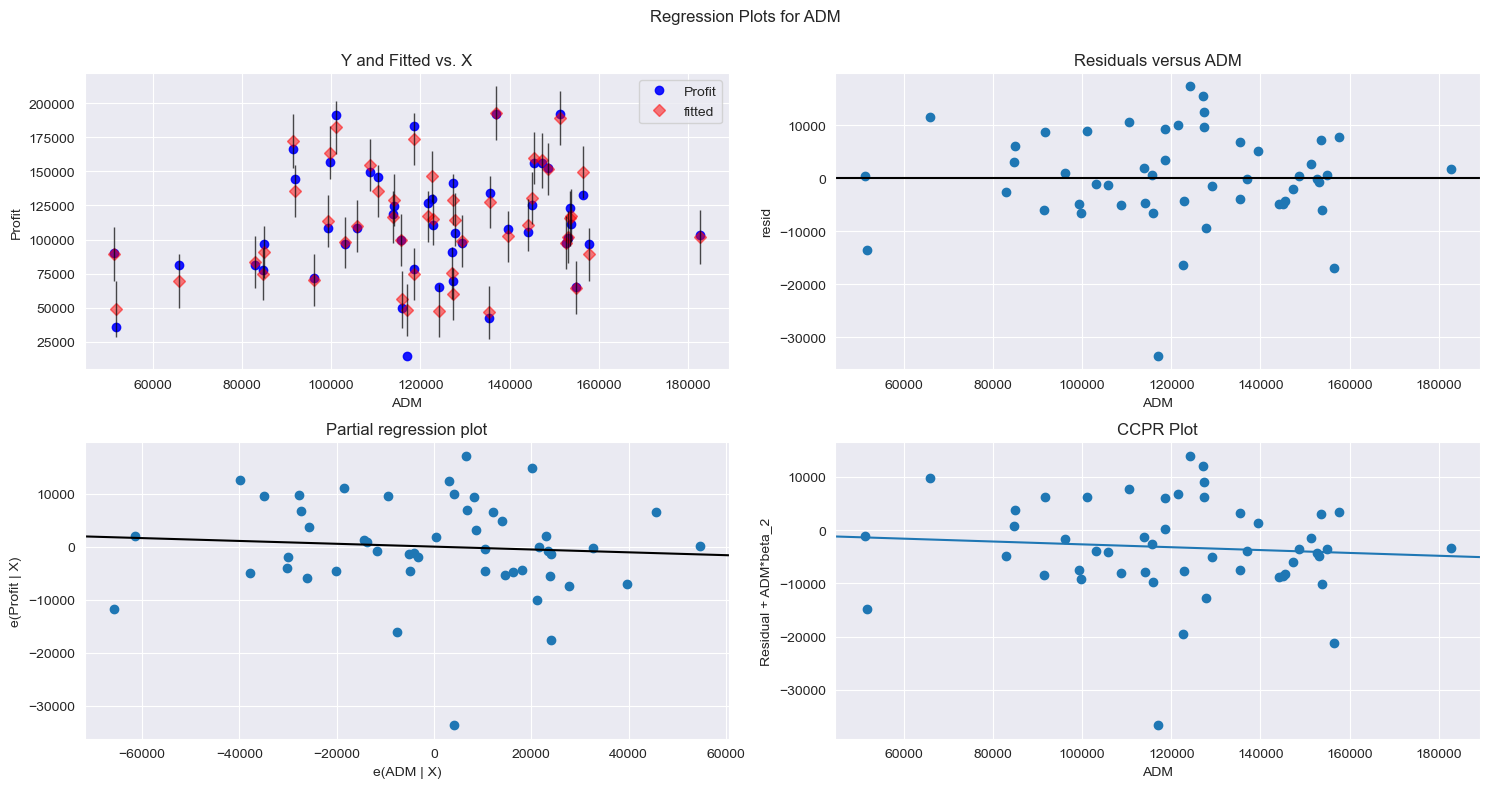

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'ADM', fig = fig)
plt.show()

eval_env: 1


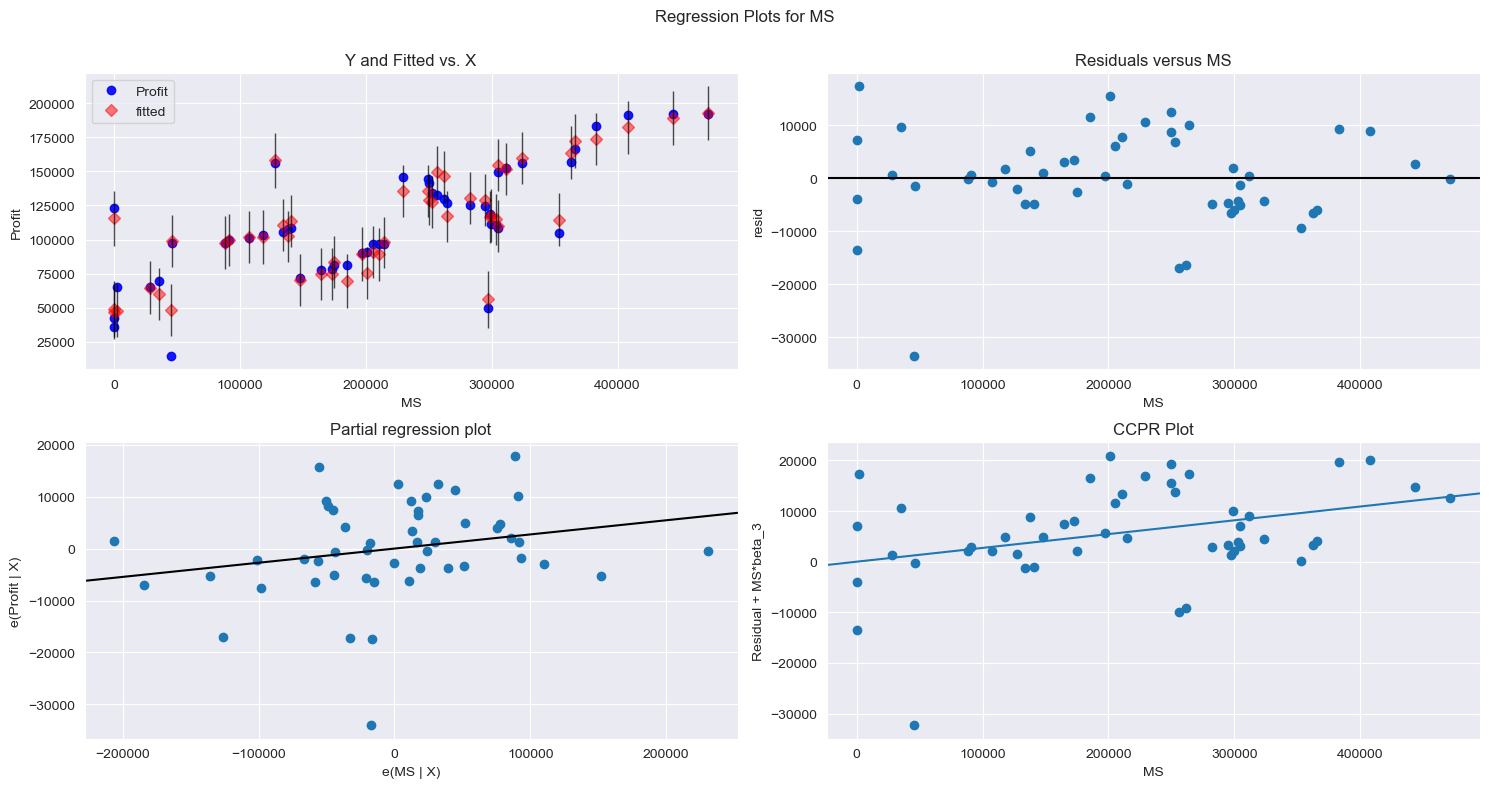

In [24]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'MS', fig = fig)
plt.show()

# Model Deletion Diagnostics ( checking outliers or influencers)


Two Techniques : 1. Cook's Distance

In [25]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

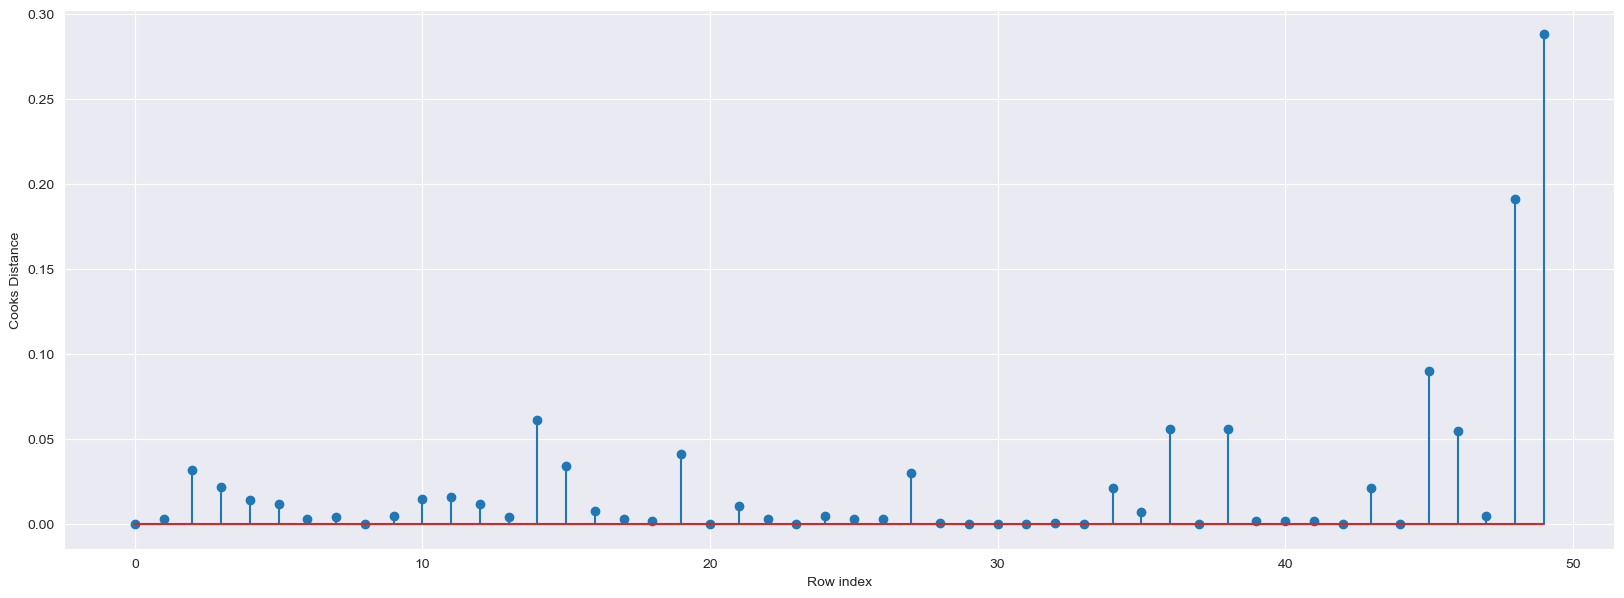

In [26]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
(np.argmax(c), np.max(c))

(49, 0.28808229275432634)

2. Leverage value

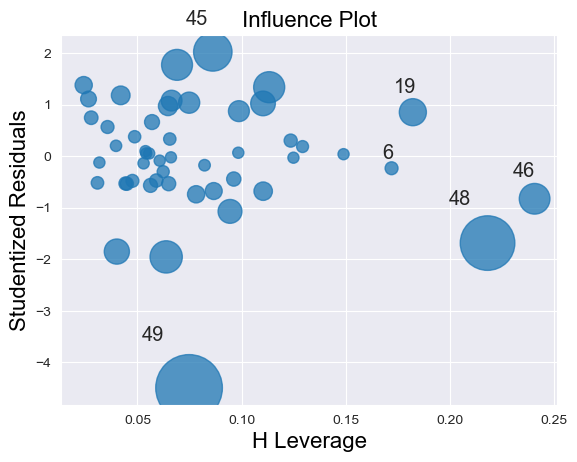

In [28]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [29]:
startup.shape

(50, 5)

In [30]:
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k + 1 )/n)
leverage_cutoff

0.36

In [31]:
startup[startup.index.isin([49])]

,RDS,ADM,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [32]:
startup

,RDS,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [33]:
startup1 = startup.drop(startup.index[[49]], axis = 0).reset_index(drop=True)
startup1

,RDS,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [34]:
final_data = smf.ols('Profit~ RDS+ADM+MS', data = startup1).fit()
final_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 04 May 2023   Prob (F-statistic):           8.85e-32
Time:                        23:57:39   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
ADM           -0.0222      0.043     -0.518      0.607      -0.109       0.064
MS             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
(final_data.rsquared, final_data.rsquared_adj)

(0.9613162435129847, 0.9587373264138503)

# predicting for new Data

In [36]:
new_data = pd.DataFrame({'RDS': 15860,'ADM':58236,'MS':852965}, index= [0])
new_data

,RDS,ADM,MS
0,15860,58236,852965


In [37]:
final_data.predict(new_data)

0    85031.328888
dtype: float64

In [38]:
y_pred = final_data.predict(startup1)
y_pred

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

Table containing R^2 value for each prepared model

In [39]:
table=pd.DataFrame({'Prep_Models': ['Model','Final_Model'],'Rsquared':[model.rsquared,final_data.rsquared]})
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

- Model -- model of the car
- Price  -- Offer Price in EUROs	
- Age_08_04 -- Age in months as in August 2004	
- Mfg_Month -- Manufacturing month (1-12)	
- Mfg_Year	-- Manufacturing Year
- KM -- Accumulated Kilometers on odometer
- Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
- HP -- Horse Power
- Met_Color	 -- Metallic Color?  (Yes=1, No=0)
- Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
- Automatic	-- Automatic ( (Yes=1, No=0)
- cc -- Cylinder Volume in cubic centimeters
- Doors -- Number of doors
- Cylinders	-- Number of cylinders
- Gears -- Number of gear positions
- Quarterly_Tax -- Quarterly road tax in EUROs
- Weight -- Weight in Kilograms
- Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
- BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
- Guarantee_Period -- 	Guarantee period in months
- ABS -- Anti-Lock Brake System (Yes=1, No=0)
- Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
- Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
- Airco -- Airconditioning  (Yes=1, No=0)
- Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
- Boardcomputer -- Boardcomputer  (Yes=1, No=0)
- CD_Player -- CD Player  (Yes=1, No=0)
- Central_Lock -- Central Lock  (Yes=1, No=0)
- Powered_Windows -- Powered Windows  (Yes=1, No=0)
- Power_Steering -- Power Steering  (Yes=1, No=0)
- Radio -- Radio  (Yes=1, No=0)
- Mistlamps	-- Mistlamps  (Yes=1, No=0)
- Sport_Model -- Sport Model  (Yes=1, No=0)
- Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
- Metallic_Rim --Metallic Rim  (Yes=1, No=0)
- Radio_cassette -- Radio Cassette  (Yes=1, No=0)
- Tow_Bar -- Tow Bar  (Yes=1, No=0)


In [2]:
df = pd.read_csv('ToyotaCorolla.csv', encoding = 'ISO-8859-1')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
df = pd.concat([df.iloc[:,2:4],df.iloc[:,6],df.iloc[:,8],df.iloc[:,12:14],df.iloc[:,15],df.iloc[:,16:18]], axis = 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [5]:
df.shape

(1436, 9)

In [6]:
df[df.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [7]:
df = df.drop_duplicates().reset_index(drop=True)

In [8]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [9]:
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [10]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [11]:
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [12]:
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

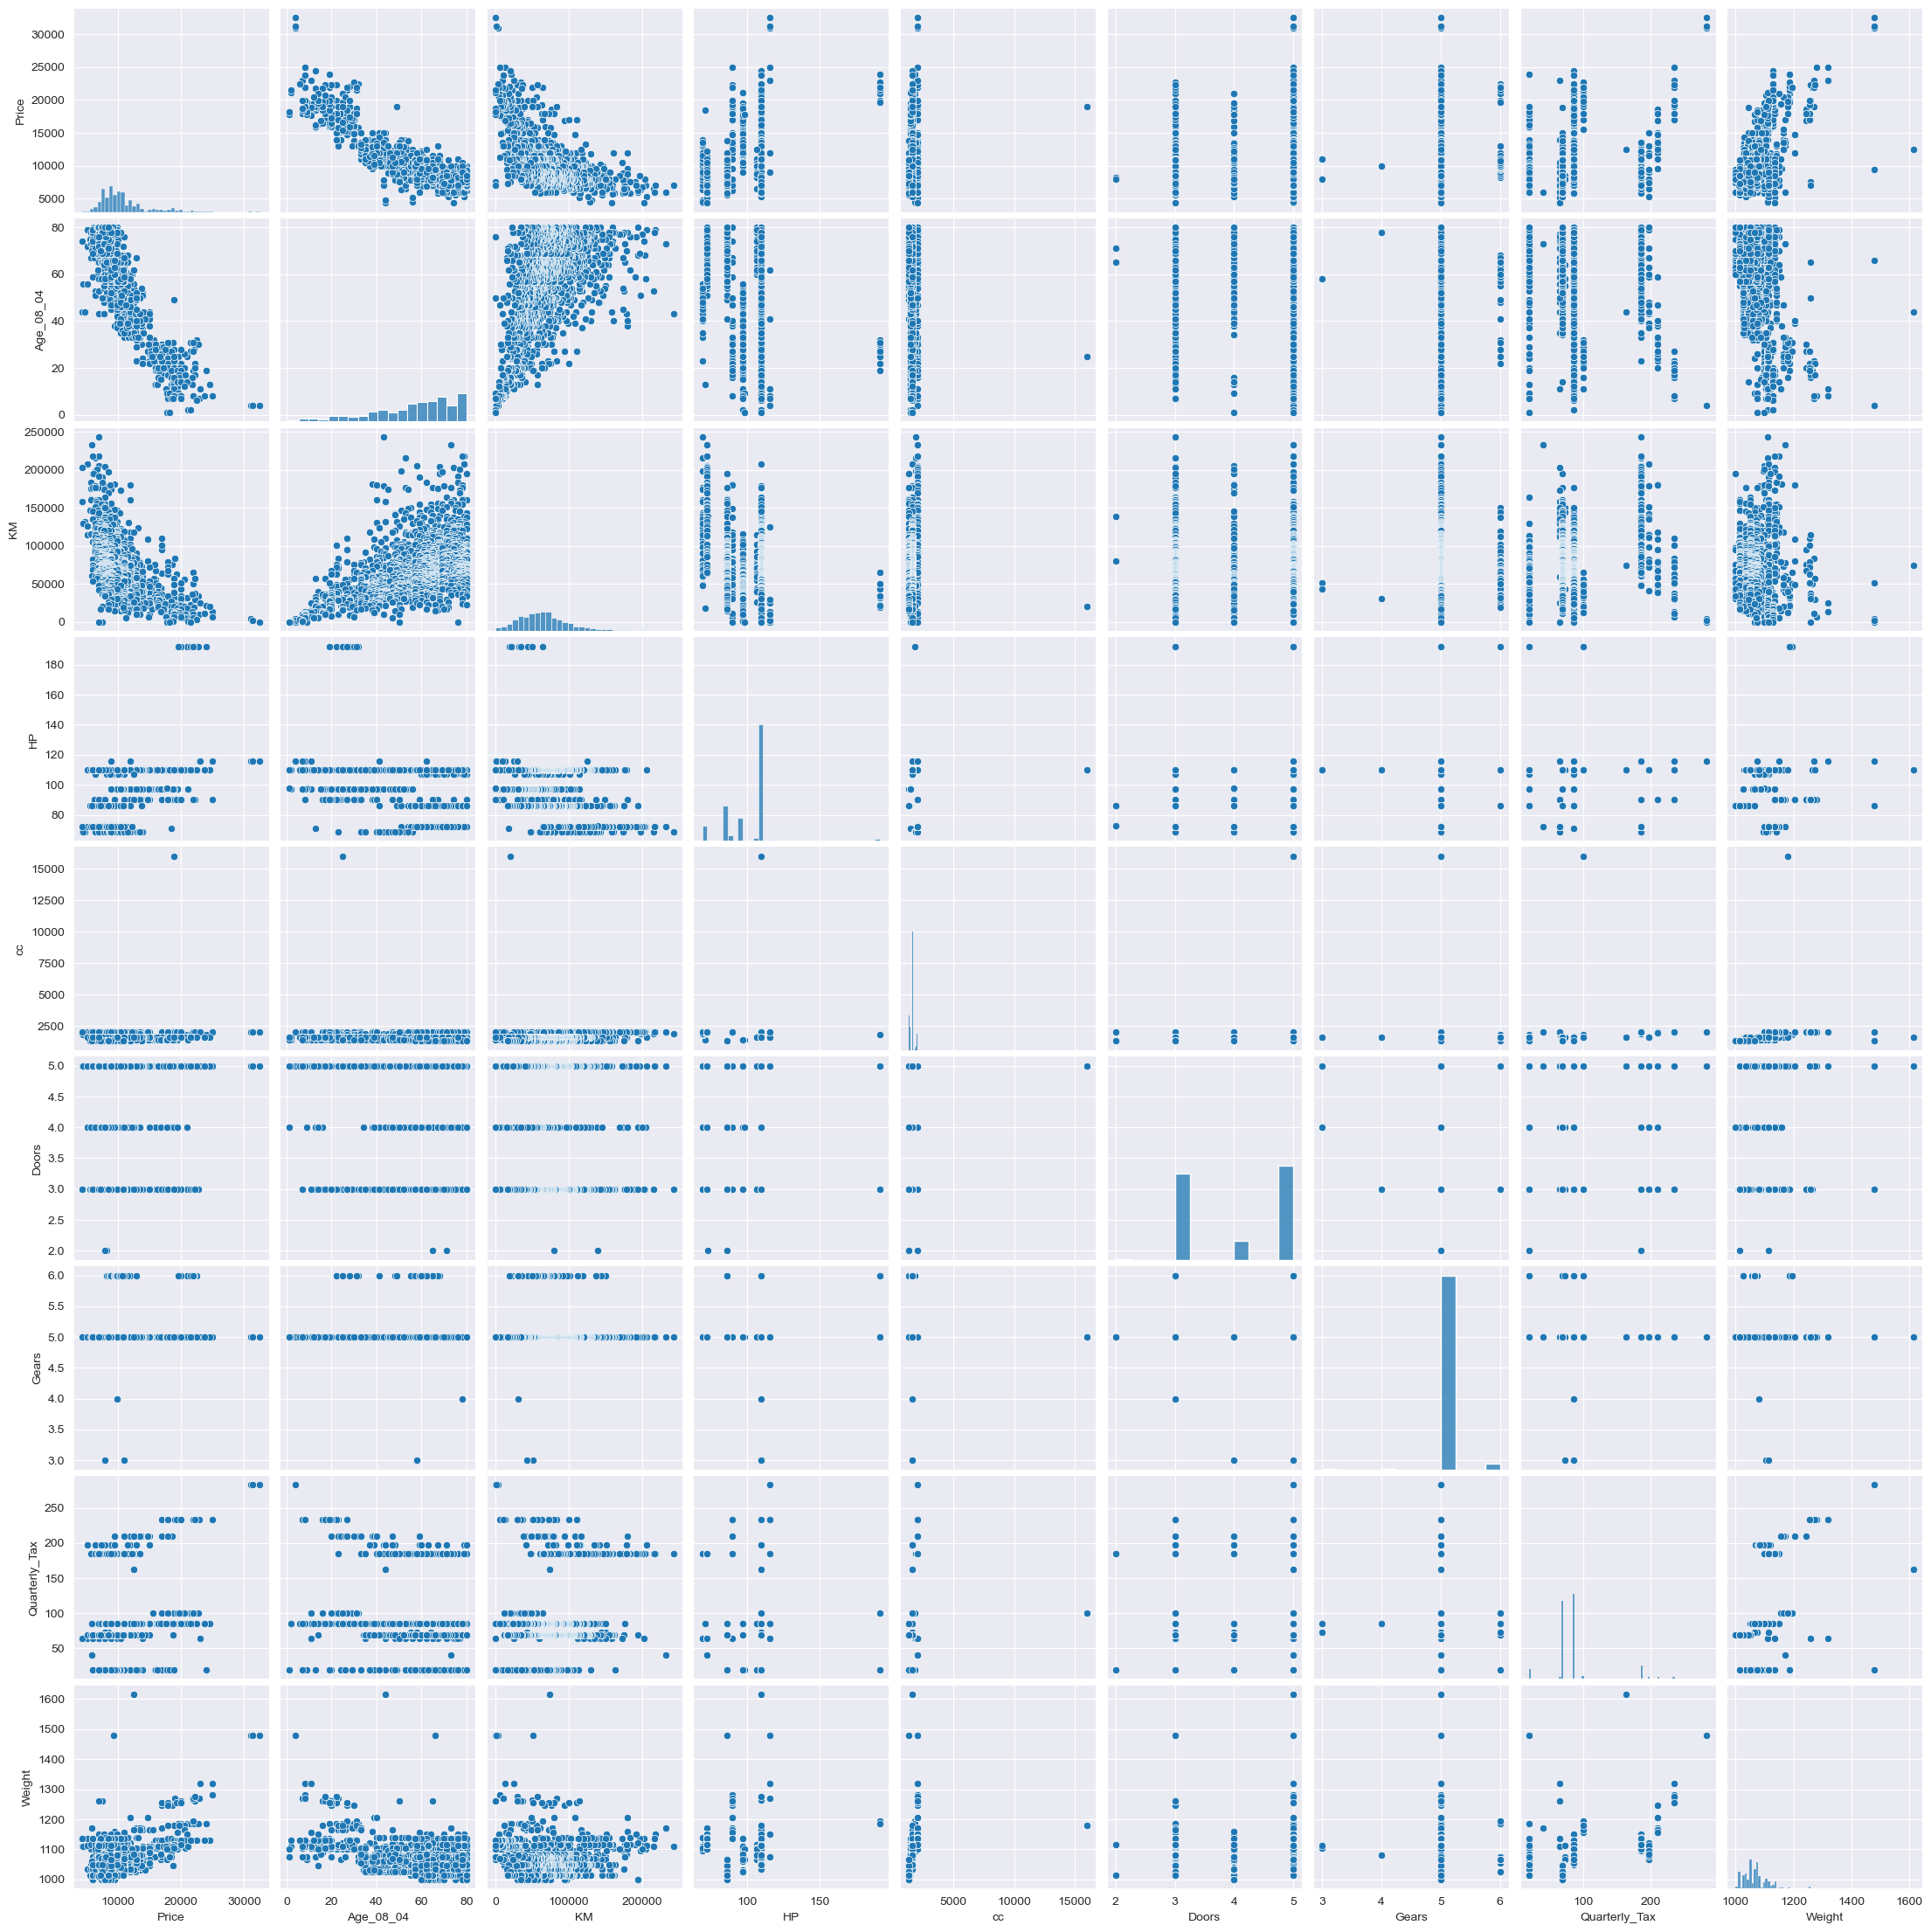

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [14]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = df).fit()

In [15]:
model.params

Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [16]:
model.tvalues

Intercept        -3.875273
Age_08_04       -46.551876
KM              -16.552424
HP               11.209719
cc               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64

In [17]:
model.pvalues

Intercept         1.113392e-04
Age_08_04        1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64

In [18]:
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

In [19]:
slr_c = smf.ols('Price~cc', data = df).fit()
print(slr_c.tvalues, '\n', slr_c.pvalues)
slr_c.summary()

Intercept    24.879592
cc            4.745039
dtype: float64 
 Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Thu, 04 May 2023   Prob (F-statistic):           2.29e-06
Time:                        23:58:30   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
slr_d = smf.ols('Price~Doors',data =df).fit()
print(slr_d.tvalues,'\n',slr_d.pvalues)
slr_d.summary()

Intercept    19.421546
Doors         7.070520
dtype: float64 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Thu, 04 May 2023   Prob (F-statistic):           2.40e-12
Time:                        23:58:30   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
slr_cd = smf.ols('Price~cc+Doors', data = df).fit()
print(slr_cd.tvalues,'\n', slr_cd.pvalues)
slr_cd.summary()

Intercept    12.786341
cc            4.268006
Doors         6.752236
dtype: float64 
 Intercept    1.580945e-35
cc           2.101878e-05
Doors        2.109558e-11
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 04 May 2023   Prob (F-statistic):           2.55e-15
Time:                        23:58:30   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = df).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data =df).fit().rsquared
vif_km = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight', data = df).fit().rsquared
vif_hp = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight', data = df).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_d = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight', data = df).fit().rsquared
vif_d = 1/(1-rsq_d)

rsq_g = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight', data = df).fit().rsquared
vif_g = 1/(1-rsq_g)

rsq_qt = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight', data = df).fit().rsquared
vif_qt = 1/(1-rsq_qt)

rsq_w = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax', data = df).fit().rsquared
vif_w = 1/(1-rsq_w)

dir1 = pd.DataFrame({'Variable':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],
       'VIF':[vif_age, vif_km, vif_hp, vif_cc, vif_d, vif_g, vif_qt, vif_w]})
dir1

,Variable,VIF
0,Age_08_04,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


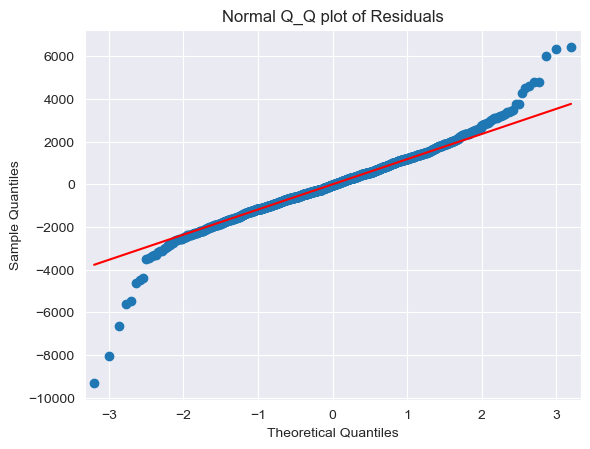

In [23]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q')
plt.title("Normal Q_Q plot of Residuals")
plt.show()

In [24]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [25]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [26]:
def standard_values(vals):
    return (vals-vals.mean())/vals.std()


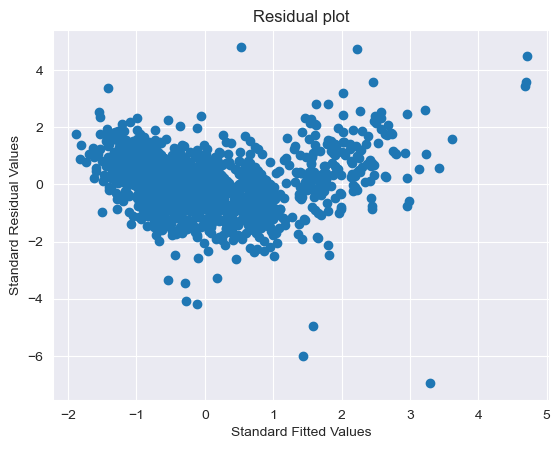

In [27]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Standard Fitted Values')
plt.ylabel('Standard Residual Values')
plt.show()

eval_env: 1


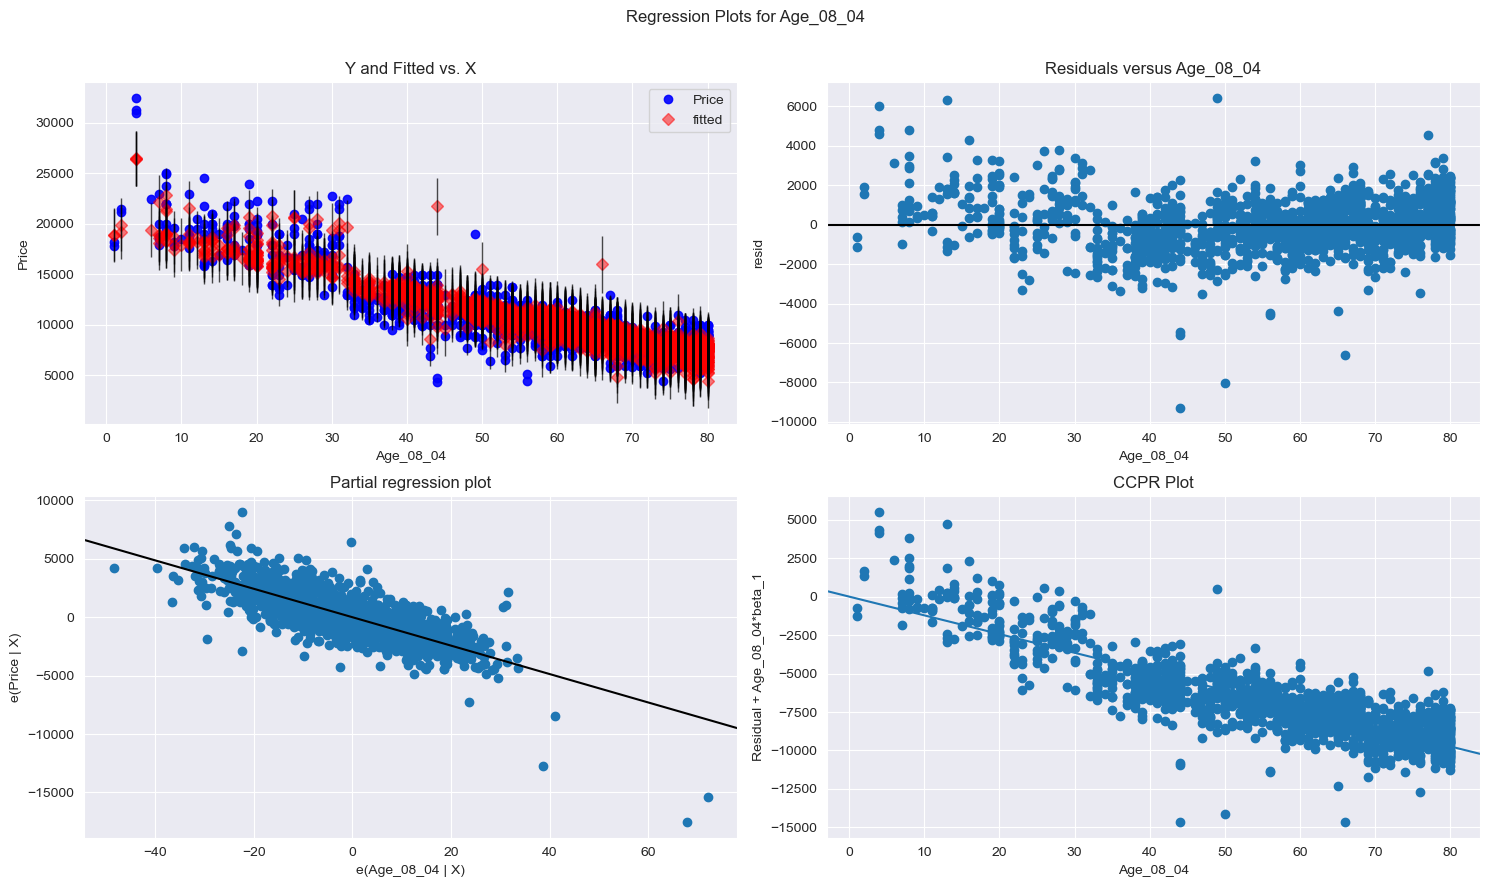

In [28]:
fig = plt.figure(figsize = (15,9))
fig = sm.graphics.plot_regress_exog(model,'Age_08_04', fig = fig)
plt.show()

eval_env: 1


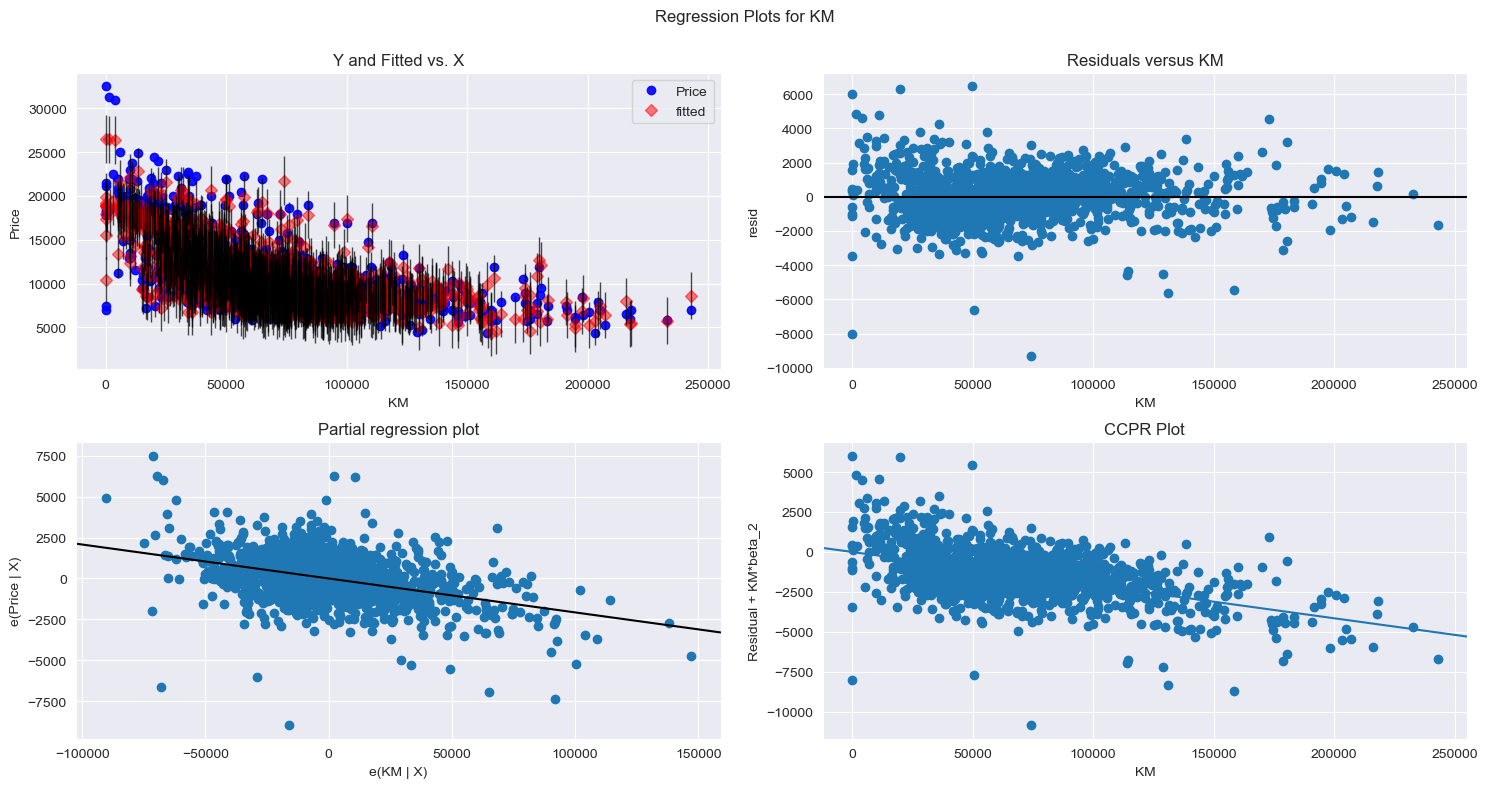

In [29]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'KM', fig = fig)
plt.show()

eval_env: 1


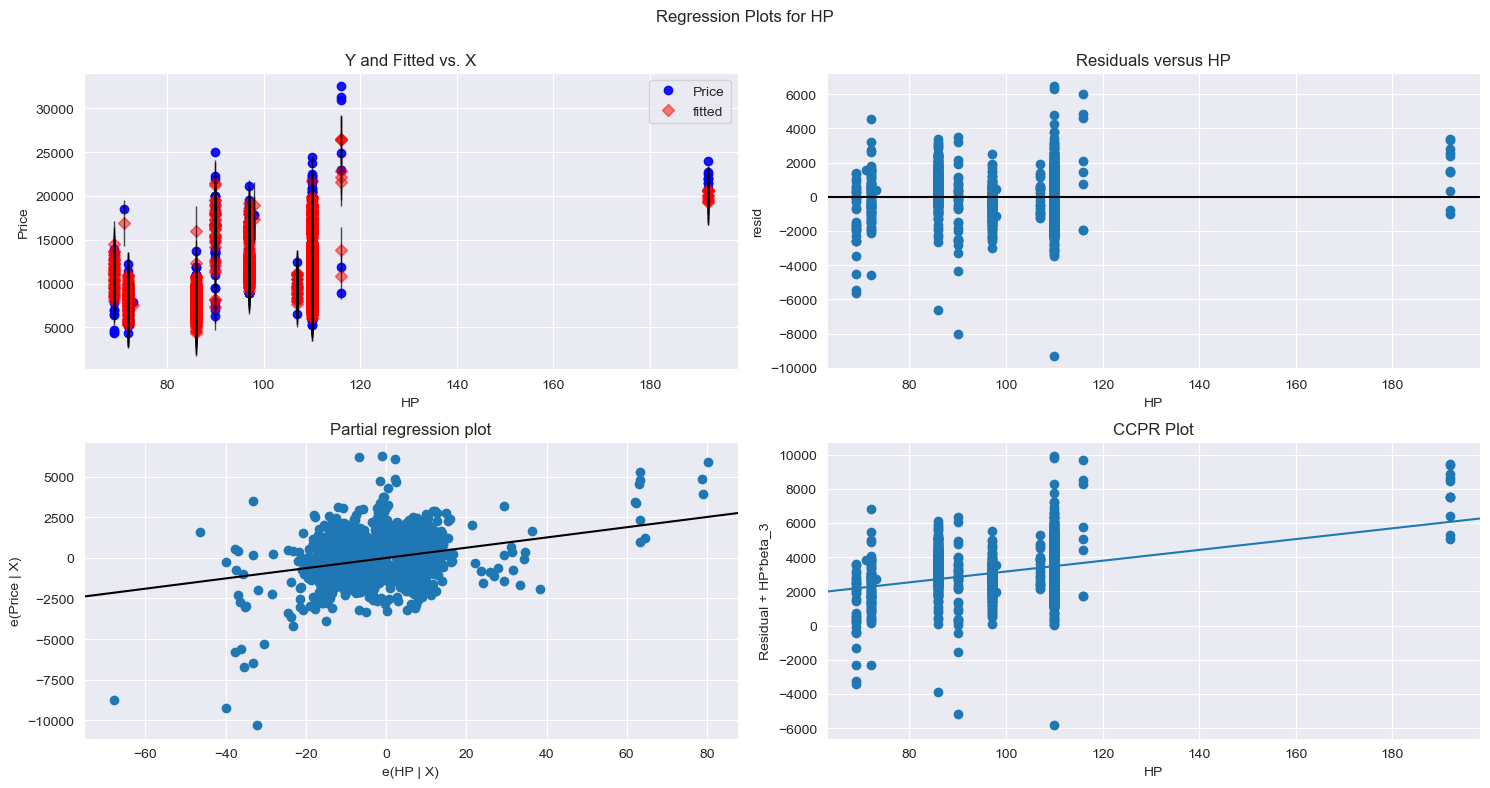

In [30]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig = fig)
plt.show()

eval_env: 1


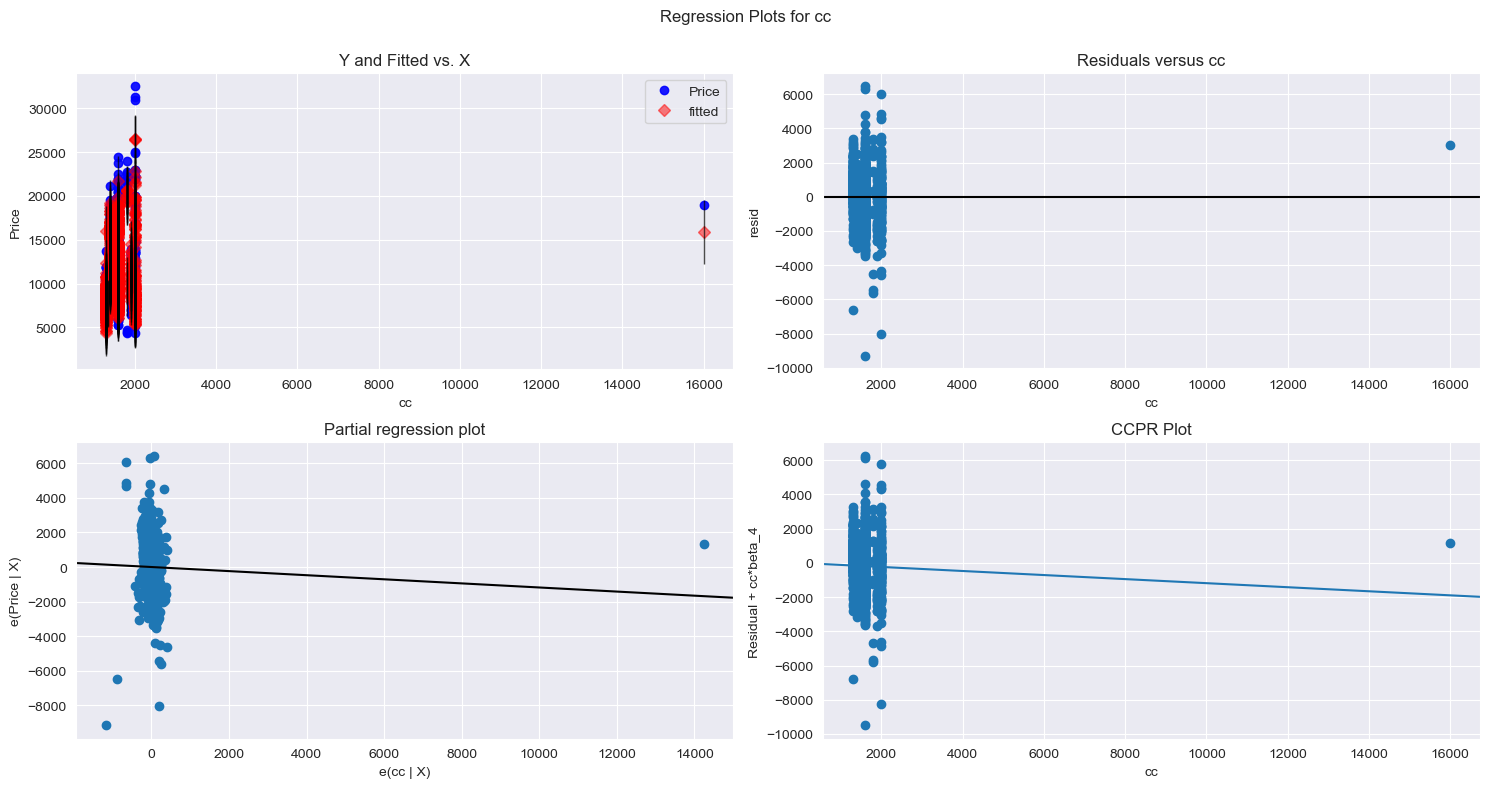

In [31]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'cc', fig = fig)
plt.show()

eval_env: 1


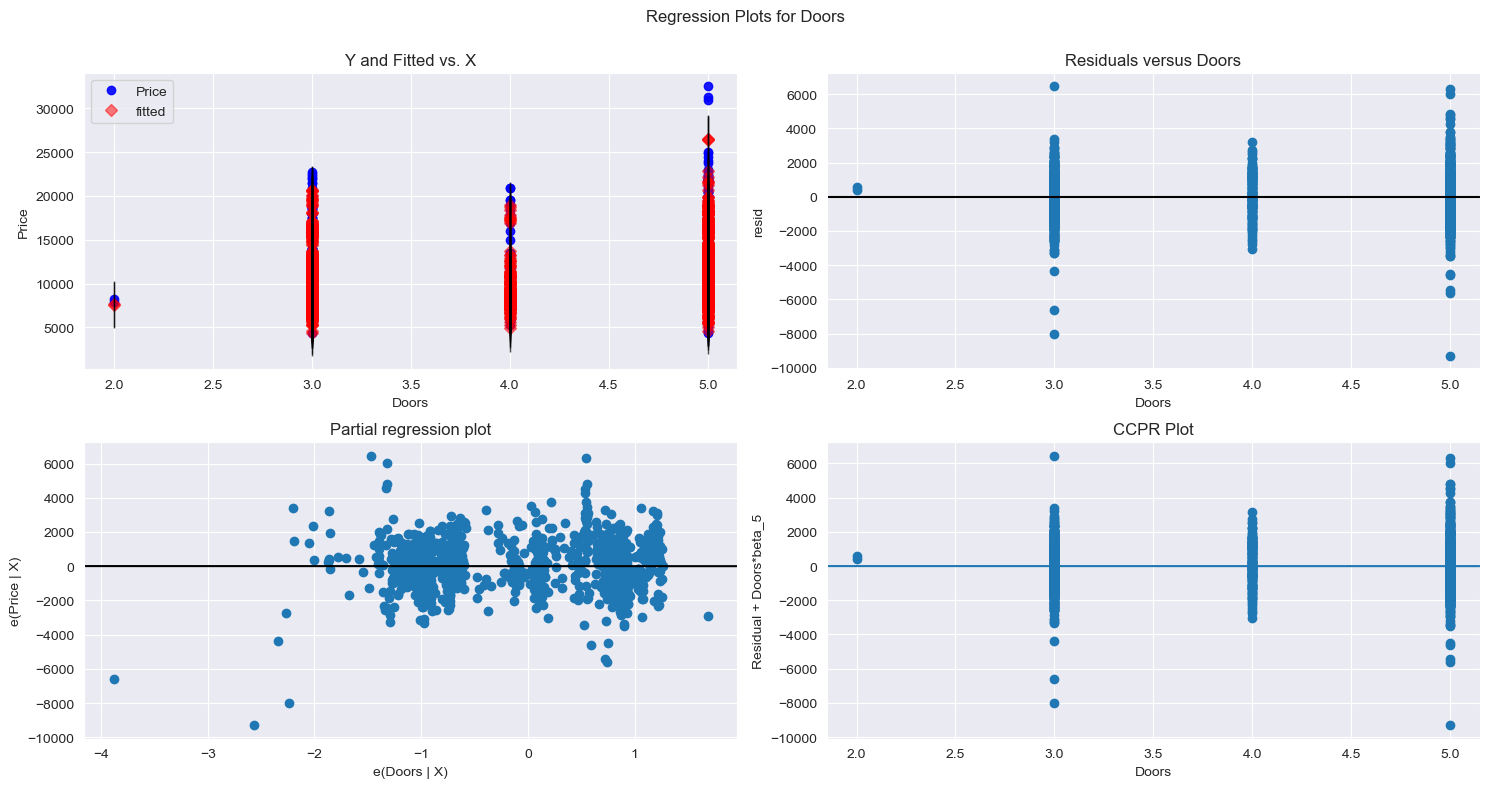

In [32]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'Doors', fig = fig)
plt.show()

eval_env: 1


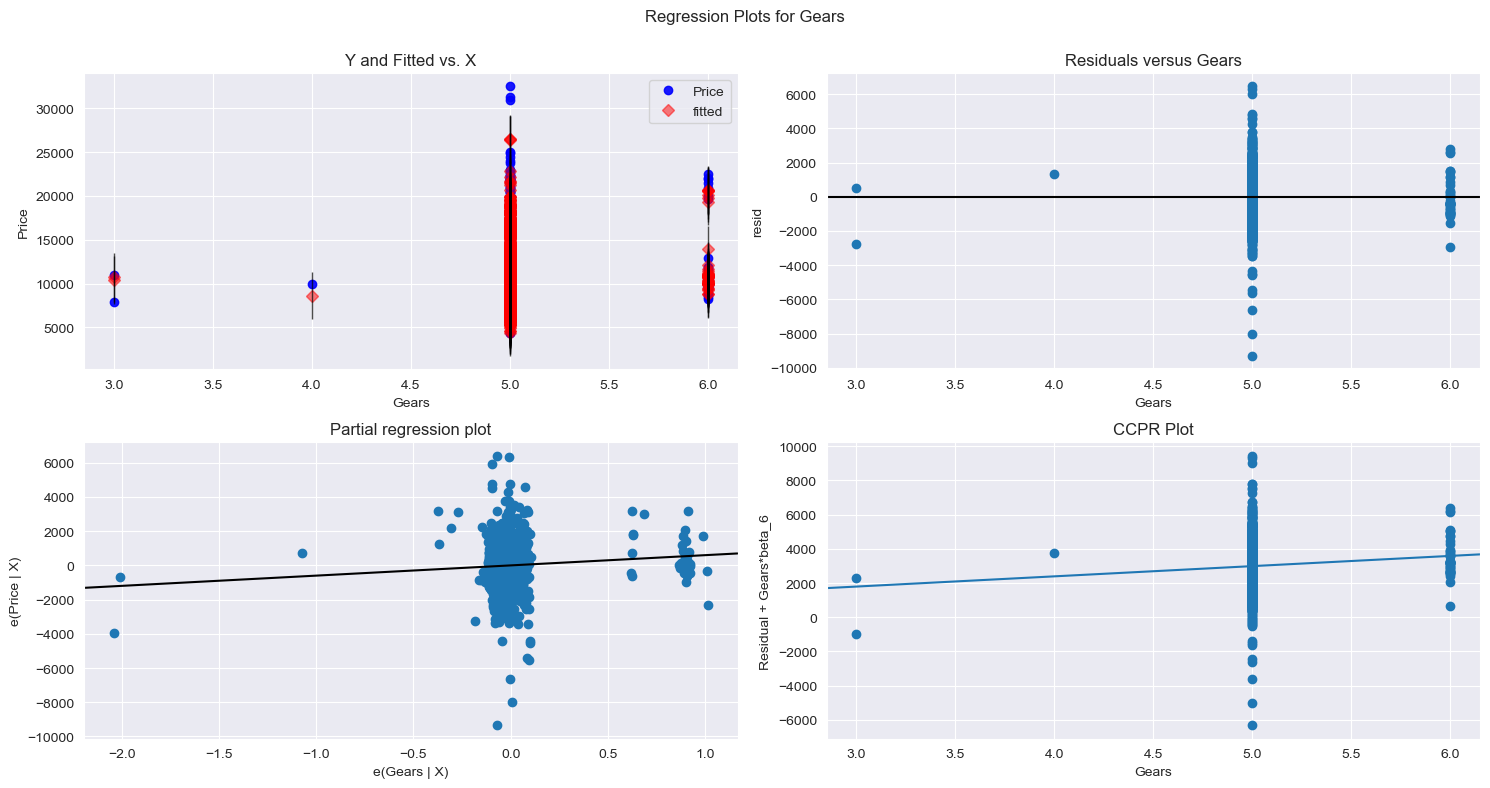

In [33]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'Gears', fig = fig)
plt.show()

eval_env: 1


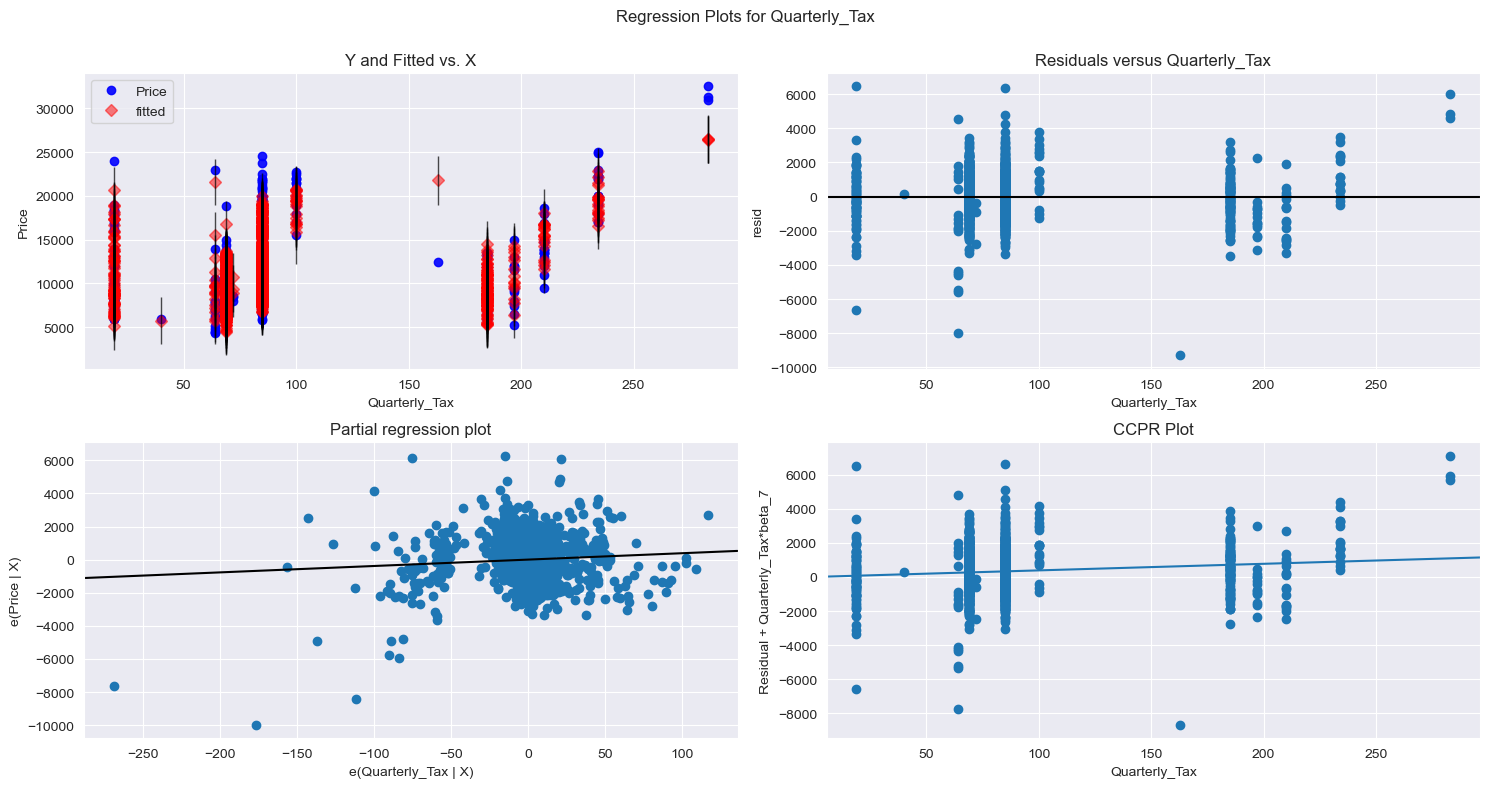

In [34]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'Quarterly_Tax', fig = fig)
plt.show()

eval_env: 1


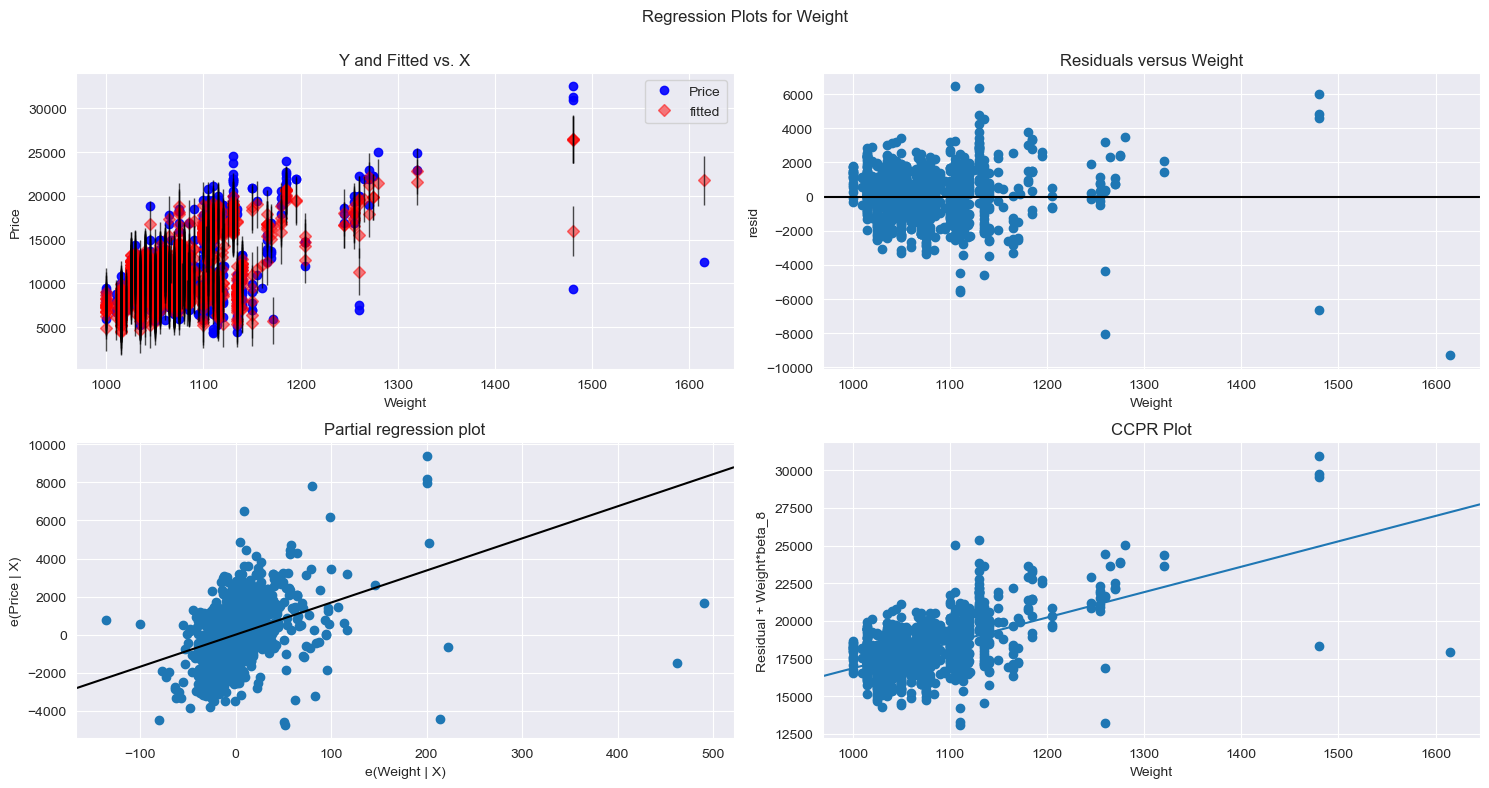

In [35]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'Weight', fig = fig)
plt.show()

In [36]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

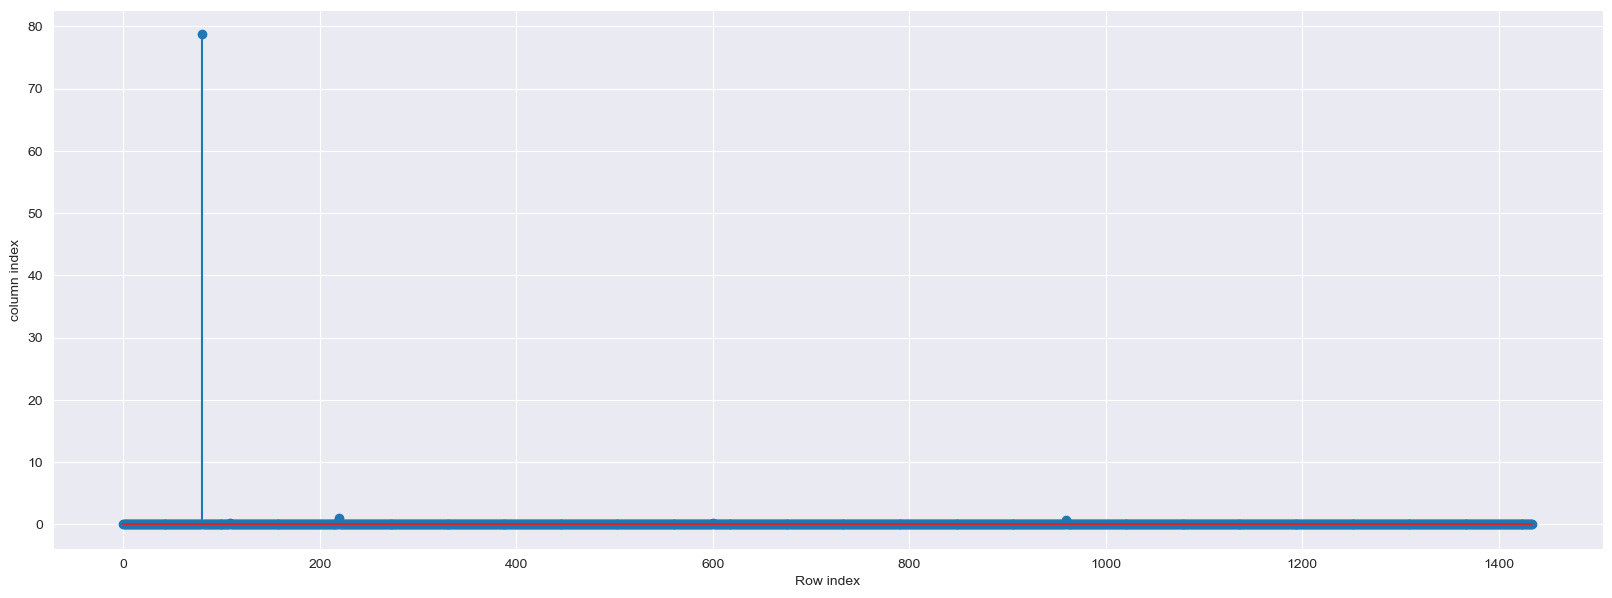

In [37]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(df)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel("column index")
plt.show()

In [38]:
(np.argmax(c), np.max(c))

(80, 78.7295058225095)

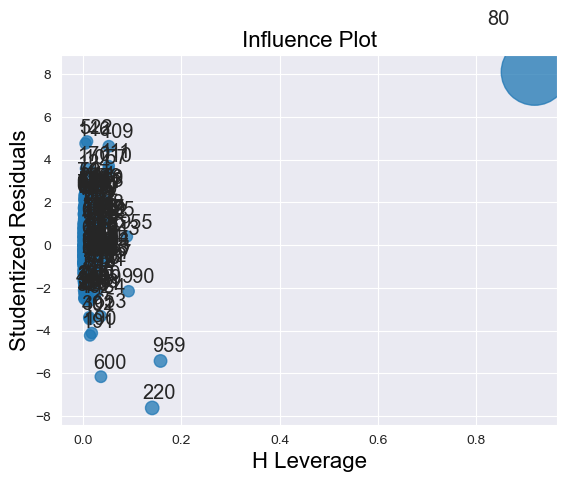

In [39]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [40]:
df.shape

(1435, 9)

In [41]:
a = df.shape[1]
s = df.shape[0]
leverage_cutoff = 3*((a+1)/s)

In [42]:
leverage_cutoff

0.020905923344947737

In [43]:
df[df.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [44]:
df1 = df

In [45]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [46]:
df2 = df1.drop(df1.index[[80]], axis = 0).reset_index(drop=True)

In [47]:
df2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [48]:
final_df = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = df2).fit()
final_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        23:58:51   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age_08_04      -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM               -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP               39.2245      2.912     13.470      0.000      33.512      44.937
cc               -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors           -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears           527.1292    192.832      2.734      0.006     148.864     905.395
Quarterly_Tax     8.9414      1.427      6.268      0.000       6.143      11.740
Weight           20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
new_data = pd.DataFrame({'Age_08_04':15,"KM": 58256,'HP':85,"cc": 1500,"Doors": 4,"Gears":7,"Quarterly_Tax":75,'Weight':1500}, index=[0])
new_data

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,15,58256,85,1500,4,7,75,1500


In [50]:
final_df.predict(new_data)

0    24876.965481
dtype: float64

In [51]:
y_pred = final_df.predict(df2)
y_pred

0       16513.565909
1       16051.656226
2       16486.949796
3       16133.995128
4       15921.372341
            ...     
1429     8970.611964
1430     8435.944671
1431     8591.765915
1432     8714.053275
1433     9966.948423
Length: 1434, dtype: float64

In [52]:
table = pd.DataFrame({'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_df.rsquared]})
table

,Prep_Models,Rsquared
0,Model,0.862520
1,Final_Model,0.868116
